### Imported packages

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, make_scorer, accuracy_score, precision_score, average_precision_score, \
classification_report, recall_score, confusion_matrix, f1_score

## Question 1 Initial Data

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(10)

data = pd.read_csv('Data/question1 - initial.csv')
data.dropna(inplace=True)
data.head()

,resultId,raceId,driverId,constructorId,grid,circuitId,turns,lap_length,race_laps,race_distance,max_speed,drs_zone,full_throttle_percentage,longest_flatout_section,downforce_level,gear_changes_per_lap,label
0,1,18,1,1,1,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,1
1,2,18,2,2,5,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,1
2,3,18,3,3,7,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,1
3,4,18,4,4,11,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,1
4,5,18,5,1,3,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,1


In [31]:
data = data.drop(['resultId', 'raceId'], axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611 entries, 0 to 4785
Data columns (total 15 columns):
driverId                    4611 non-null int64
constructorId               4611 non-null int64
grid                        4611 non-null int64
circuitId                   4611 non-null int64
turns                       4611 non-null int64
lap_length                  4611 non-null float64
race_laps                   4611 non-null int64
race_distance               4611 non-null float64
max_speed                   4611 non-null float64
drs_zone                    4611 non-null int64
full_throttle_percentage    4611 non-null float64
longest_flatout_section     4611 non-null int64
downforce_level             4611 non-null float64
gear_changes_per_lap        4611 non-null int64
label                       4611 non-null int64
dtypes: float64(5), int64(10)
memory usage: 576.4 KB


In [33]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1:]

In [34]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = X.columns, index=X.index)
X.head()

,driverId,constructorId,grid,circuitId,turns,lap_length,race_laps,race_distance,max_speed,drs_zone,full_throttle_percentage,longest_flatout_section,downforce_level,gear_changes_per_lap
0,0.000000,0.000000,0.041667,0.0,0.4,0.536133,0.388889,0.880121,0.786051,1.0,0.86,0.129272,1.0,0.36
1,0.001196,0.004785,0.208333,0.0,0.4,0.536133,0.388889,0.880121,0.786051,1.0,0.86,0.129272,1.0,0.36
2,0.002392,0.009569,0.291667,0.0,0.4,0.536133,0.388889,0.880121,0.786051,1.0,0.86,0.129272,1.0,0.36
3,0.003589,0.014354,0.458333,0.0,0.4,0.536133,0.388889,0.880121,0.786051,1.0,0.86,0.129272,1.0,0.36
4,0.004785,0.000000,0.125000,0.0,0.4,0.536133,0.388889,0.880121,0.786051,1.0,0.86,0.129272,1.0,0.36


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

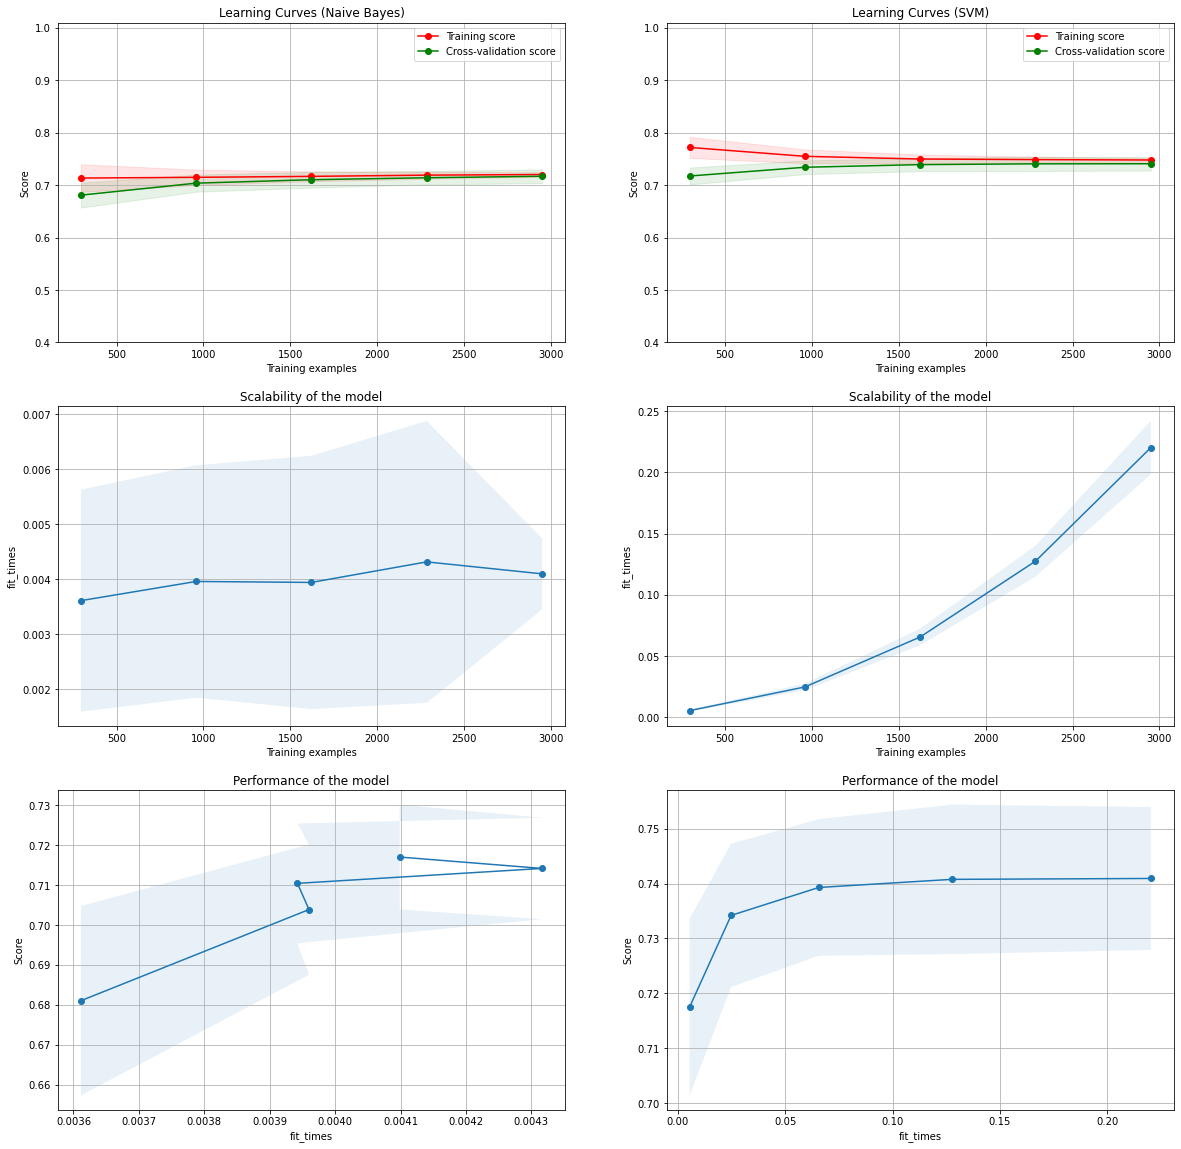

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,random_state = 0)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    acc = test_scores_mean[-1]

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt,acc


fig, axes = plt.subplots(3, 2, figsize=(20, 20))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plt,NB_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC()
plt,svm_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [37]:
print("Naive Bayes Validation Accuracy: " + str(NB_acc*100) + "%")
print("Support Vector Machine Validation Accuracy: " + str(svm_acc*100) + "%")

Naive Bayes Validation Accuracy: 71.70596205962062%
Support Vector Machine Validation Accuracy: 74.09214092140924%


In [38]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Naive Bayes test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Naive Bayes average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Naive Bayes f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Naive Bayes roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Naive Bayes test accuracy: 0.7399783315276273
Naive Bayes average precision score: 0.6780577693238047
Naive Bayes f1_score: 0.7494780793319414
Naive Bayes roc_auc_score: 0.7396789098524619


C:\Users\Shearman Chua\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [39]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("SVM test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("SVM average precision score: " + str(average_precision_score(y_test, y_pred)))
print("SVM f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("SVM roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

C:\Users\Shearman Chua\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVM test accuracy: 0.7562296858071506
SVM average precision score: 0.6968909687113084
SVM f1_score: 0.7593582887700534
SVM roc_auc_score: 0.756174810529578


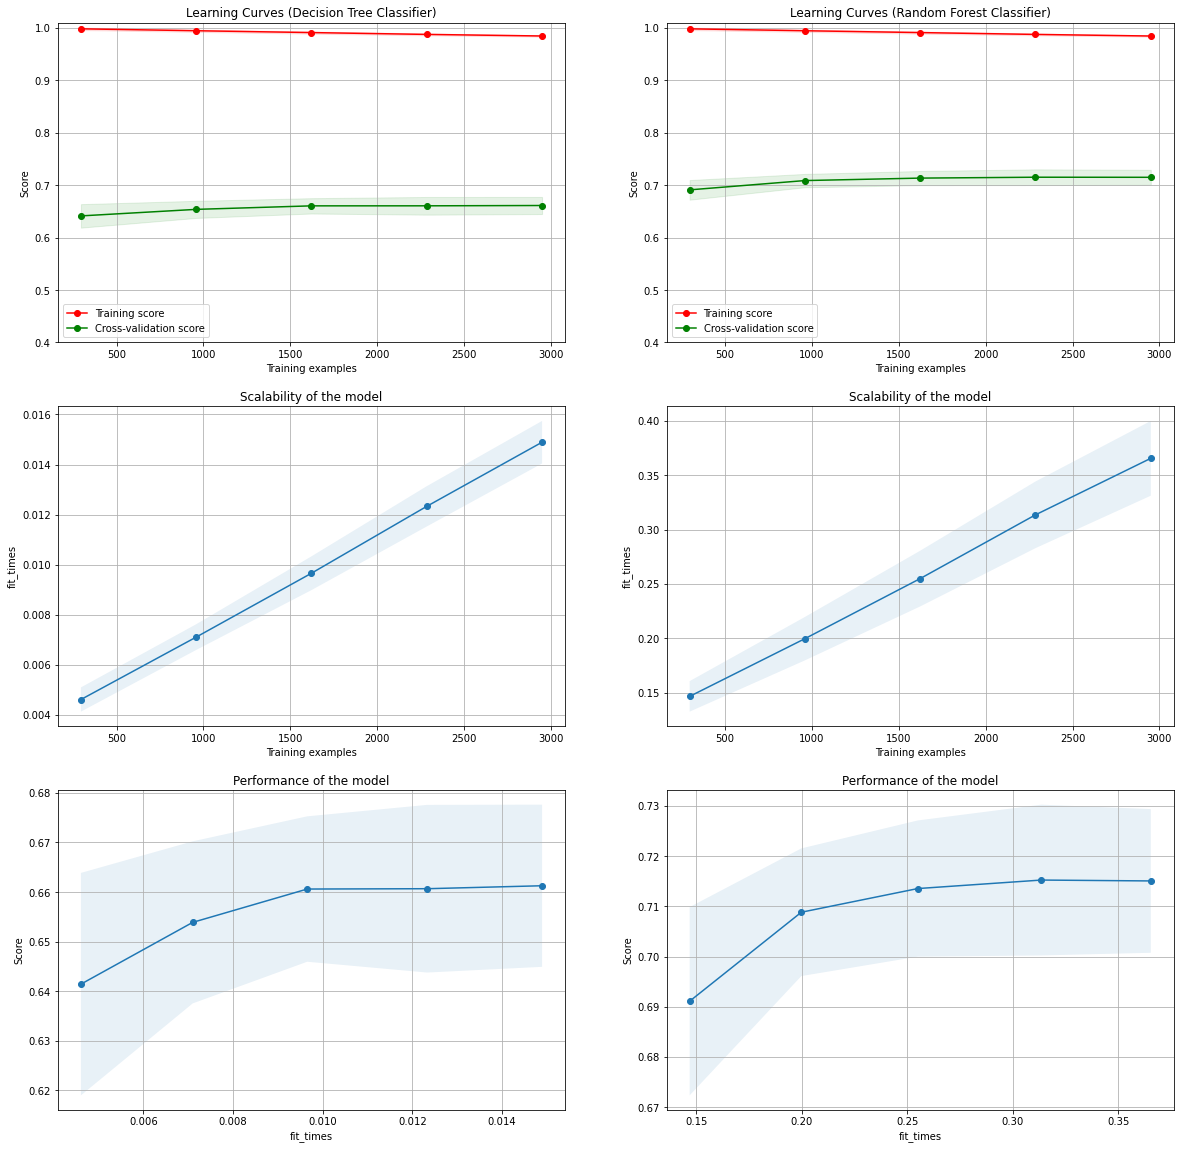

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

title = "Learning Curves (Decision Tree Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(random_state = random.seed(10))
plt,DT_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Random Forest Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(random_state = random.seed(10))
plt,RF_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [41]:
print("Decision Tree Accuracy: " + str(DT_acc*100) + "%")
print("Random Forest Accuracy: " + str(RF_acc*100) + "%")

Decision Tree Accuracy: 66.12601626016257%
Random Forest Accuracy: 71.50542005420057%


In [42]:
clf = DecisionTreeClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Decision Tree test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Decision Tree average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Decision Tree f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Decision Tree roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Decision Tree test accuracy: 0.6879739978331527
Decision Tree average precision score: 0.6341551930372067
Decision Tree f1_score: 0.6883116883116883
Decision Tree roc_auc_score: 0.6880288502174097


In [43]:
clf = RandomForestClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Random Forest test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Random Forest average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Random Forest f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Random Forest roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

<ipython-input-43-a68f006266d8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Random Forest test accuracy: 0.7215601300108342
Random Forest average precision score: 0.6625392292766853
Random Forest f1_score: 0.7274655355249204
Random Forest roc_auc_score: 0.7214174359744931


## Question 1 with Added Data

In [44]:
import numpy as np
np.random.seed(10)

data = pd.read_csv('Data/question1 - final.csv')
data.dropna(inplace=True)
data.head()

,resultId,raceId,driverId,constructorId,grid,circuitId,turns,lap_length,race_laps,race_distance,max_speed,drs_zone,full_throttle_percentage,longest_flatout_section,downforce_level,gear_changes_per_lap,driver_error_rate,constructor_error_rate,circuit_error_rate,label
0,1,18,1,1,1,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,0.009615,0.155894,0.126246,1
1,2,18,2,2,5,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,0.016949,0.100000,0.126246,1
2,3,18,3,3,7,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,0.004854,0.131429,0.126246,1
3,4,18,4,4,11,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,0.011538,0.137097,0.126246,1
4,5,18,5,1,3,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,0.017857,0.155894,0.126246,1


In [45]:
data = data.drop(['resultId', 'raceId'], axis=1)

data['driver_error_rate'] = data['driver_error_rate']*1000
data['constructor_error_rate'] = data['constructor_error_rate']*100
data['circuit_error_rate'] = data['circuit_error_rate']*100
data.head()

,driverId,constructorId,grid,circuitId,turns,lap_length,race_laps,race_distance,max_speed,drs_zone,full_throttle_percentage,longest_flatout_section,downforce_level,gear_changes_per_lap,driver_error_rate,constructor_error_rate,circuit_error_rate,label
0,1,1,1,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,9.615385,15.589354,12.624585,1
1,2,2,5,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,16.949153,10.000000,12.624585,1
2,3,3,7,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,4.854369,13.142857,12.624585,1
3,4,4,11,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,11.538462,13.709677,12.624585,1
4,5,1,3,1,16,5.303,58,307.574,321.1,2,0.77,843,5.0,46,17.857143,15.589354,12.624585,1


In [46]:
data.constructorId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  23, 131, 205, 166, 164, 208, 206,
       207, 210, 209], dtype=int64)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611 entries, 0 to 4785
Data columns (total 18 columns):
driverId                    4611 non-null int64
constructorId               4611 non-null int64
grid                        4611 non-null int64
circuitId                   4611 non-null int64
turns                       4611 non-null int64
lap_length                  4611 non-null float64
race_laps                   4611 non-null int64
race_distance               4611 non-null float64
max_speed                   4611 non-null float64
drs_zone                    4611 non-null int64
full_throttle_percentage    4611 non-null float64
longest_flatout_section     4611 non-null int64
downforce_level             4611 non-null float64
gear_changes_per_lap        4611 non-null int64
driver_error_rate           4611 non-null float64
constructor_error_rate      4611 non-null float64
circuit_error_rate          4611 non-null float64
label                       4611 non-null int64
dtypes: float

In [48]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1:]

In [49]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = X.columns, index=X.index)
X.head()

,driverId,constructorId,grid,circuitId,turns,lap_length,race_laps,race_distance,max_speed,drs_zone,full_throttle_percentage,longest_flatout_section,downforce_level,gear_changes_per_lap,driver_error_rate,constructor_error_rate,circuit_error_rate
0,0.000000,0.000000,0.041667,0.0,0.4,0.536133,0.388889,0.880121,0.786051,1.0,0.86,0.129272,1.0,0.36,0.026904,0.486353,0.573643
1,0.001196,0.004785,0.208333,0.0,0.4,0.536133,0.388889,0.880121,0.786051,1.0,0.86,0.129272,1.0,0.36,0.068346,0.271429,0.573643
2,0.002392,0.009569,0.291667,0.0,0.4,0.536133,0.388889,0.880121,0.786051,1.0,0.86,0.129272,1.0,0.36,0.000000,0.392279,0.573643
3,0.003589,0.014354,0.458333,0.0,0.4,0.536133,0.388889,0.880121,0.786051,1.0,0.86,0.129272,1.0,0.36,0.037771,0.414074,0.573643
4,0.004785,0.000000,0.125000,0.0,0.4,0.536133,0.388889,0.880121,0.786051,1.0,0.86,0.129272,1.0,0.36,0.073477,0.486353,0.573643


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
X_test_inverse = min_max_scaler.inverse_transform(X_test)

In [52]:
drivers = []
constructors = []

for i in X_test_inverse:
  drivers.append(i[0])
  constructors.append(i[1])

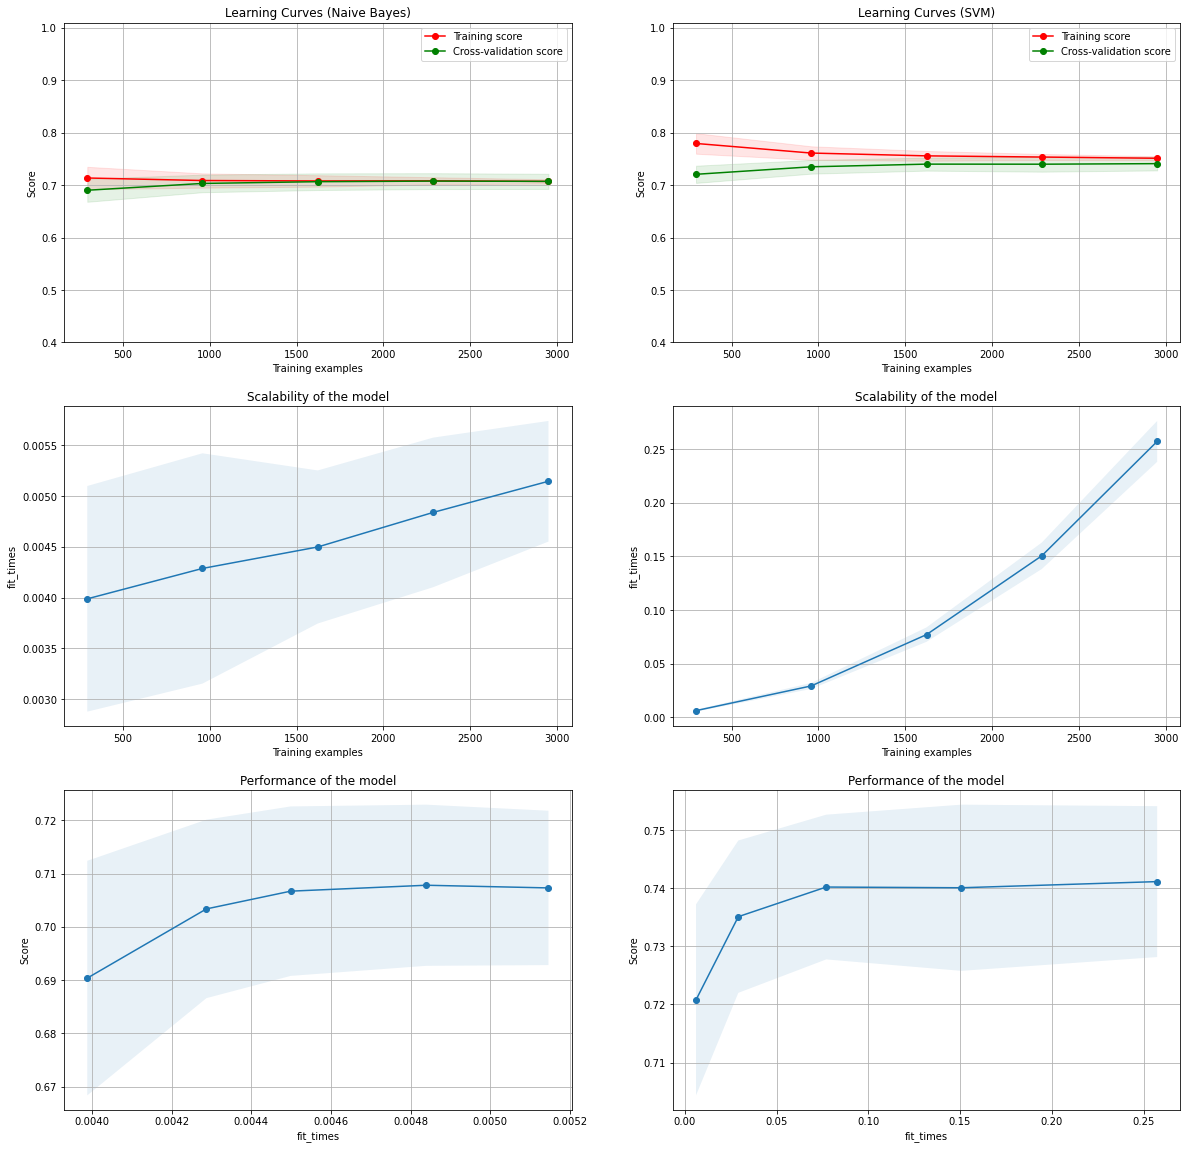

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,random_state = 0)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    acc = test_scores_mean[-1]

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt,acc


fig, axes = plt.subplots(3, 2, figsize=(20, 20))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plt,NB_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC()
plt,svm_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [54]:
print("Naive Bayes Validation Accuracy: " + str(NB_acc*100) + "%")
print("Support Vector Machine Validation Accuracy: " + str(svm_acc*100) + "%")

Naive Bayes Validation Accuracy: 70.73035230352305%
Support Vector Machine Validation Accuracy: 74.11246612466127%


In [55]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Naive Bayes test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Naive Bayes average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Naive Bayes f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Naive Bayes roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Naive Bayes test accuracy: 0.7443120260021668
Naive Bayes average precision score: 0.6772063652022462
Naive Bayes f1_score: 0.7644710578842316
Naive Bayes roc_auc_score: 0.7435481447394371


C:\Users\Shearman Chua\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [56]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("SVM test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("SVM average precision score: " + str(average_precision_score(y_test, y_pred)))
print("SVM f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("SVM roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

C:\Users\Shearman Chua\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVM test accuracy: 0.7605633802816901
SVM average precision score: 0.7003409835391561
SVM f1_score: 0.7651434643995749
SVM roc_auc_score: 0.760445525492811


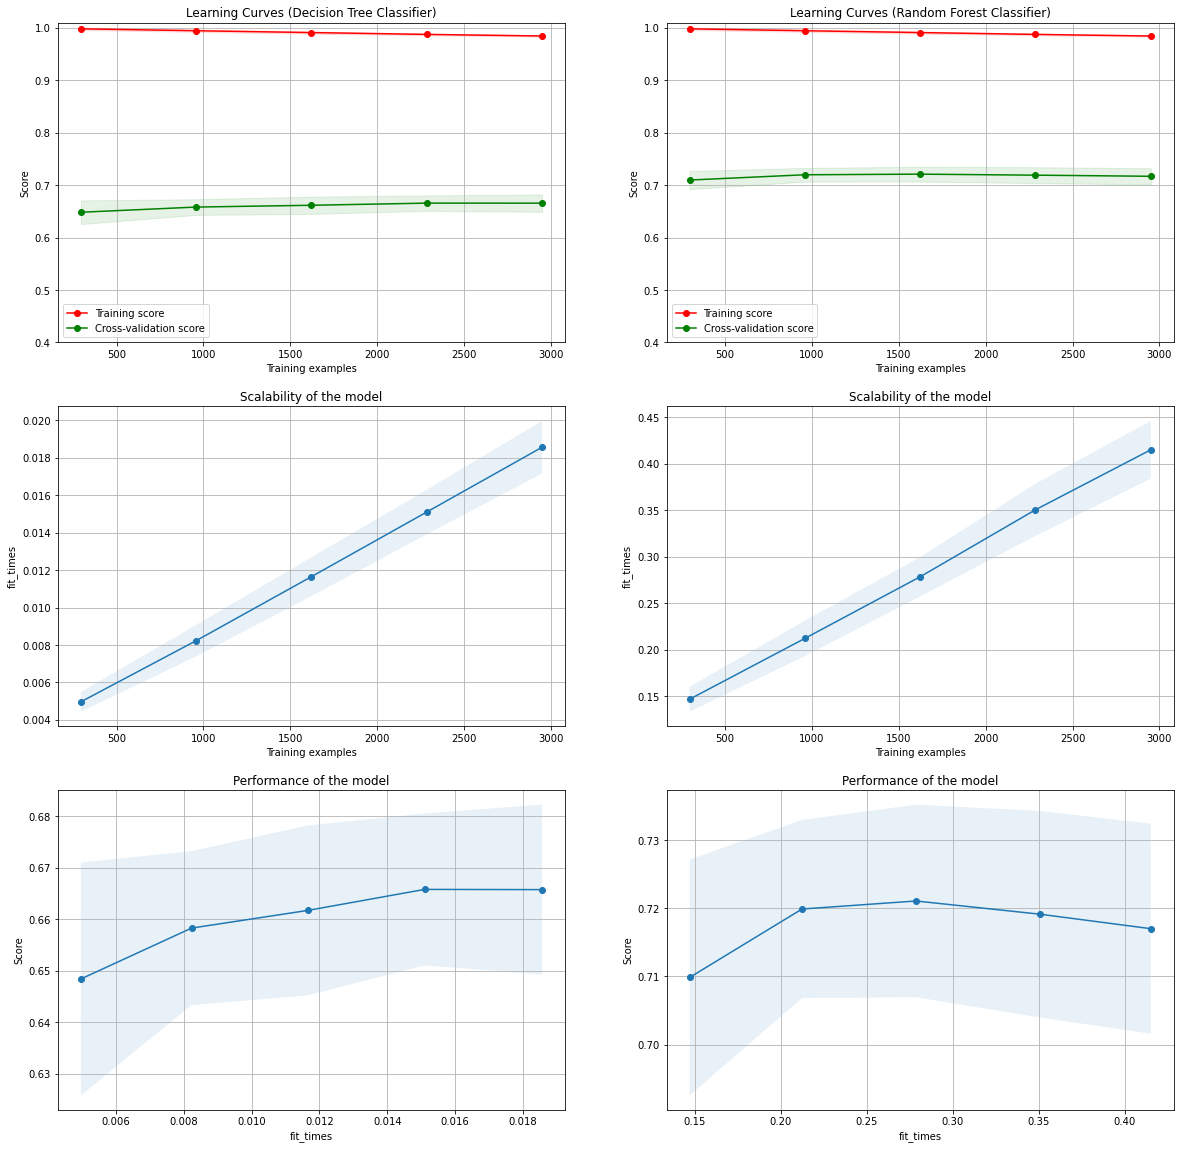

In [57]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

title = "Learning Curves (Decision Tree Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(random_state = random.seed(10))
plt,DT_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Random Forest Classifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(random_state = random.seed(10))
plt,RF_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [58]:
print("Decision Tree Accuracy: " + str(DT_acc*100) + "%")
print("Random Forest Accuracy: " + str(RF_acc*100) + "%")

Decision Tree Accuracy: 66.57588075880757%
Random Forest Accuracy: 71.70054200542009%


In [59]:
clf = DecisionTreeClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Decision Tree test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Decision Tree average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Decision Tree f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Decision Tree roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Decision Tree test accuracy: 0.6868905742145178
Decision Tree average precision score: 0.6345291544069638
Decision Tree f1_score: 0.682068206820682
Decision Tree roc_auc_score: 0.6871038025563245


In [60]:
clf = RandomForestClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Random Forest test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Random Forest average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Random Forest f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Decision Tree roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

<ipython-input-60-9f89da12942f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Random Forest test accuracy: 0.7258938244853738
Random Forest average precision score: 0.6665627168393543
Random Forest f1_score: 0.7317073170731706
Decision Tree roc_auc_score: 0.725751542528714


## Question 1 with Reduced Dataset

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
print(X_new.shape)
sec = SelectKBest(chi2, k=5).fit(X, y)
selected = sec.get_support()
print("Selected features: ")
features = ['driverId','constructorId','grid','circuitId','turns','lap_length','race_laps','race_distance','max_speed','drs_zone','full_throttle_percentage','longest_flatout_section','downforce_level','gear_changes_per_lap','driver_error_rate','constructor_error_rate','circuit_error_rate']
for i in range(0,len(selected)):
  if(selected[i]==True):
    print(features[i])

(4611, 5)
Selected features: 
driverId
constructorId
grid
driver_error_rate
constructor_error_rate


(4611, 5)


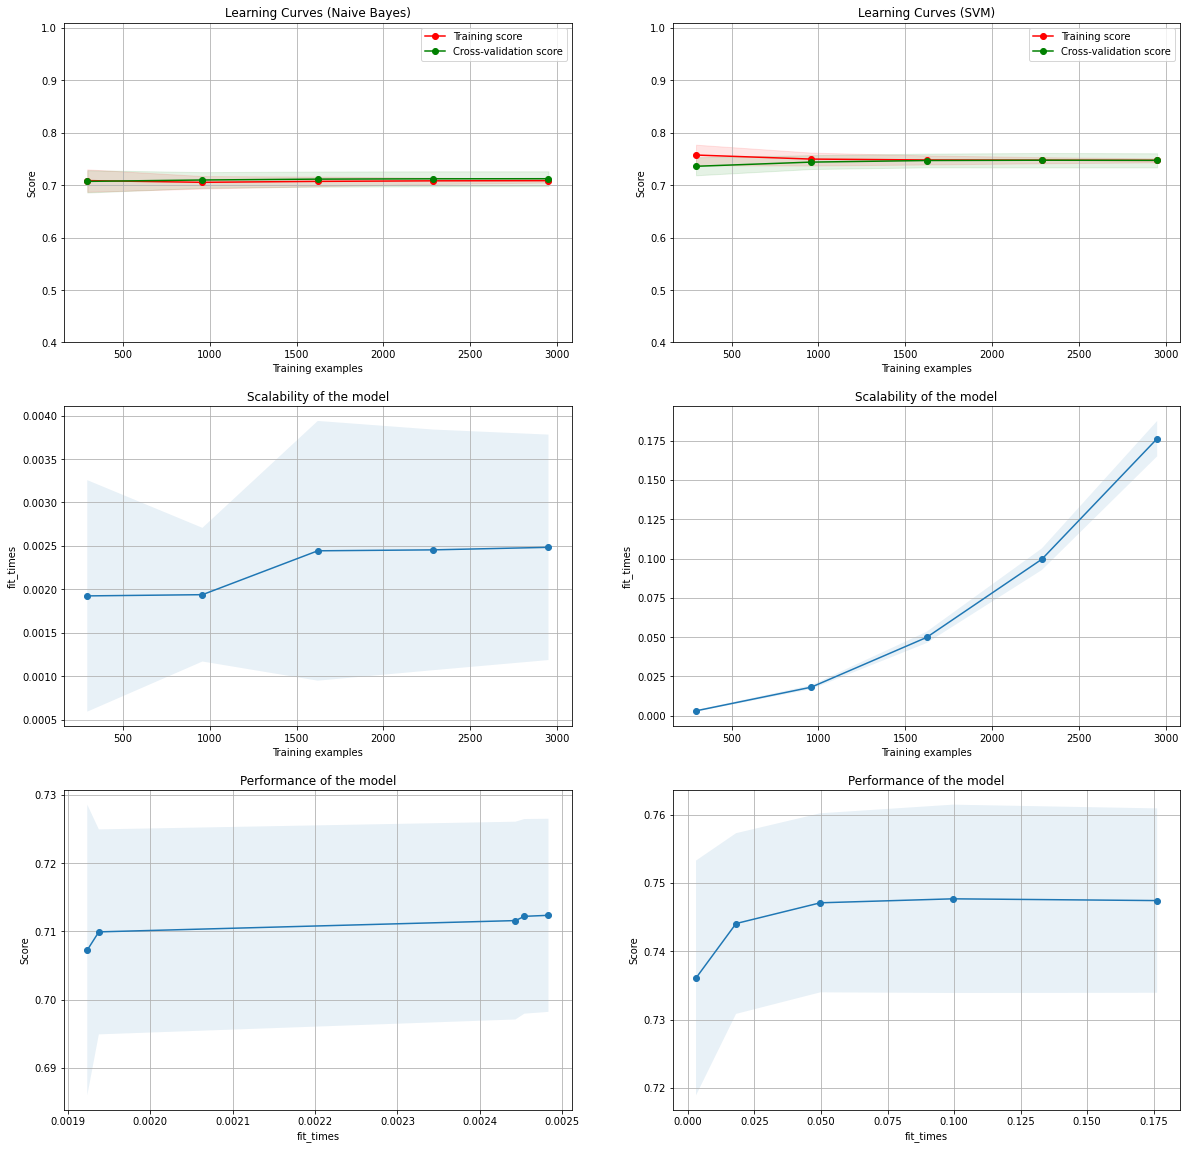

In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
print(X_new.shape)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

fig, axes = plt.subplots(3, 2, figsize=(20, 20))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plt,NB_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC()
plt,svm_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [63]:
print("Naive Bayes Accuracy: " + str(NB_acc*100) + "%")
print("Support Vector Machine Accuracy: " + str(svm_acc*100) + "%")

Naive Bayes Accuracy: 71.23577235772359%
Support Vector Machine Accuracy: 74.74119241192413%


In [64]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Naive Bayes test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Naive Bayes average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Naive Bayes f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Naive Bayes roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Naive Bayes test accuracy: 0.7486457204767064
Naive Bayes average precision score: 0.680974829229451
Naive Bayes f1_score: 0.7689243027888445
Naive Bayes roc_auc_score: 0.7478611207633287


C:\Users\Shearman Chua\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [65]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("SVM test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("SVM average precision score: " + str(average_precision_score(y_test, y_pred)))
print("SVM f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("SVM roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

C:\Users\Shearman Chua\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVM test accuracy: 0.7627302275189599
SVM average precision score: 0.7022154702356898
SVM f1_score: 0.7677624602332981
SVM roc_auc_score: 0.762591448239592


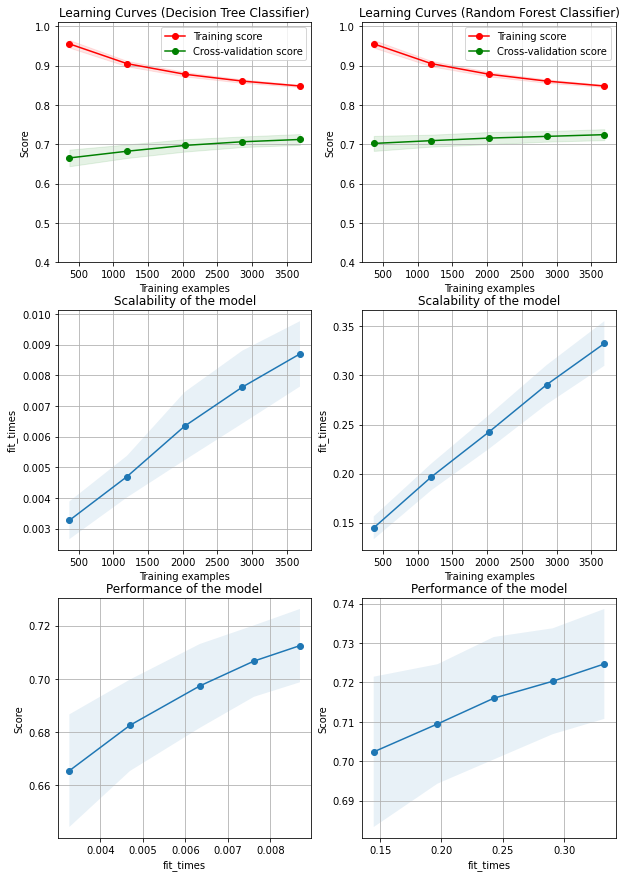

In [66]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Decision Tree Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(random_state = random.seed(10))
plt,DT_acc = plot_learning_curve(estimator, title, X_new, y, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Random Forest Classifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(random_state = random.seed(10))
plt,RF_acc = plot_learning_curve(estimator, title, X_new, y, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [67]:
print("Decision Tree Accuracy: " + str(DT_acc*100) + "%")
print("Random Forest Accuracy: " + str(RF_acc*100) + "%")

Decision Tree Accuracy: 71.24593716143012%
Random Forest Accuracy: 72.47128927410618%


In [68]:
clf = DecisionTreeClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Decision Tree test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Decision Tree average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Decision Tree f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Decision Tree roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Decision Tree test accuracy: 0.7356446370530878
Decision Tree average precision score: 0.6792141691349816
Decision Tree f1_score: 0.7336244541484717
Decision Tree roc_auc_score: 0.7357885444351575


In [69]:
clf = RandomForestClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Random Forest test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Random Forest average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Random Forest f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Random Forest roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

<ipython-input-69-a68f006266d8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Random Forest test accuracy: 0.7443120260021668
Random Forest average precision score: 0.6829151889163844
Random Forest f1_score: 0.7521008403361343
Random Forest roc_auc_score: 0.7440764079976709


## Question 1 using Artificial Neural Network

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [71]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback

histories = {}

np.random.seed(10)
tf.random.set_seed(10)

# create the model
l2 = tf.keras.regularizers.l2(l2=1e-6)

model = Sequential([
    Dense(20, activation='relu', kernel_regularizer=l2),
    #Dense(10, activation='relu', kernel_regularizer=l2),
    Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay = 1e-6)

model.compile(optimizer=opt,
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = 'models/qn1.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# train the model
histories['qn1'] =model.fit(X_train, y_train,
                            epochs=200,
                            verbose = 2,
                            batch_size=4,
                            callbacks = [model_checkpoint_callback],
                            validation_data=(X_test, y_test))

Epoch 1/200
922/922 - 1s - loss: 1.1235 - accuracy: 0.5466 - val_loss: 0.9652 - val_accuracy: 0.6685
Epoch 2/200
922/922 - 1s - loss: 0.8875 - accuracy: 0.6375 - val_loss: 0.8173 - val_accuracy: 0.6468
Epoch 3/200
922/922 - 1s - loss: 0.7856 - accuracy: 0.6459 - val_loss: 0.7445 - val_accuracy: 0.6609
Epoch 4/200
922/922 - 1s - loss: 0.7314 - accuracy: 0.6678 - val_loss: 0.7013 - val_accuracy: 0.6891
Epoch 5/200
922/922 - 1s - loss: 0.6969 - accuracy: 0.6912 - val_loss: 0.6714 - val_accuracy: 0.7075
Epoch 6/200
922/922 - 1s - loss: 0.6722 - accuracy: 0.7183 - val_loss: 0.6487 - val_accuracy: 0.7291
Epoch 7/200
922/922 - 1s - loss: 0.6532 - accuracy: 0.7272 - val_loss: 0.6304 - val_accuracy: 0.7476
Epoch 8/200
922/922 - 1s - loss: 0.6375 - accuracy: 0.7335 - val_loss: 0.6148 - val_accuracy: 0.7486
Epoch 9/200
922/922 - 1s - loss: 0.6242 - accuracy: 0.7332 - val_loss: 0.6013 - val_accuracy: 0.7595
Epoch 10/200
922/922 - 1s - loss: 0.6125 - accuracy: 0.7332 - val_loss: 0.5895 - val_accura

Epoch 82/200
922/922 - 2s - loss: 0.5251 - accuracy: 0.7432 - val_loss: 0.4989 - val_accuracy: 0.7660
Epoch 83/200
922/922 - 1s - loss: 0.5250 - accuracy: 0.7421 - val_loss: 0.4982 - val_accuracy: 0.7649
Epoch 84/200
922/922 - 1s - loss: 0.5249 - accuracy: 0.7435 - val_loss: 0.4984 - val_accuracy: 0.7660
Epoch 85/200
922/922 - 1s - loss: 0.5249 - accuracy: 0.7438 - val_loss: 0.4987 - val_accuracy: 0.7660
Epoch 86/200
922/922 - 1s - loss: 0.5249 - accuracy: 0.7438 - val_loss: 0.4978 - val_accuracy: 0.7692
Epoch 87/200
922/922 - 1s - loss: 0.5250 - accuracy: 0.7408 - val_loss: 0.4980 - val_accuracy: 0.7638
Epoch 88/200
922/922 - 1s - loss: 0.5247 - accuracy: 0.7459 - val_loss: 0.4995 - val_accuracy: 0.7660
Epoch 89/200
922/922 - 1s - loss: 0.5249 - accuracy: 0.7427 - val_loss: 0.4982 - val_accuracy: 0.7660
Epoch 90/200
922/922 - 1s - loss: 0.5248 - accuracy: 0.7419 - val_loss: 0.4986 - val_accuracy: 0.7649
Epoch 91/200
922/922 - 1s - loss: 0.5248 - accuracy: 0.7432 - val_loss: 0.4984 - v

Epoch 162/200
922/922 - 7s - loss: 0.5231 - accuracy: 0.7427 - val_loss: 0.4971 - val_accuracy: 0.7725
Epoch 163/200
922/922 - 7s - loss: 0.5234 - accuracy: 0.7411 - val_loss: 0.4976 - val_accuracy: 0.7660
Epoch 164/200
922/922 - 8s - loss: 0.5233 - accuracy: 0.7432 - val_loss: 0.4976 - val_accuracy: 0.7660
Epoch 165/200
922/922 - 7s - loss: 0.5233 - accuracy: 0.7408 - val_loss: 0.4972 - val_accuracy: 0.7681
Epoch 166/200
922/922 - 6s - loss: 0.5233 - accuracy: 0.7421 - val_loss: 0.4973 - val_accuracy: 0.7671
Epoch 167/200
922/922 - 9s - loss: 0.5232 - accuracy: 0.7432 - val_loss: 0.4977 - val_accuracy: 0.7660
Epoch 168/200
922/922 - 8s - loss: 0.5232 - accuracy: 0.7411 - val_loss: 0.4978 - val_accuracy: 0.7660
Epoch 169/200
922/922 - 6s - loss: 0.5232 - accuracy: 0.7413 - val_loss: 0.4979 - val_accuracy: 0.7649
Epoch 170/200
922/922 - 5s - loss: 0.5233 - accuracy: 0.7438 - val_loss: 0.4972 - val_accuracy: 0.7671
Epoch 171/200
922/922 - 4s - loss: 0.5231 - accuracy: 0.7421 - val_loss: 

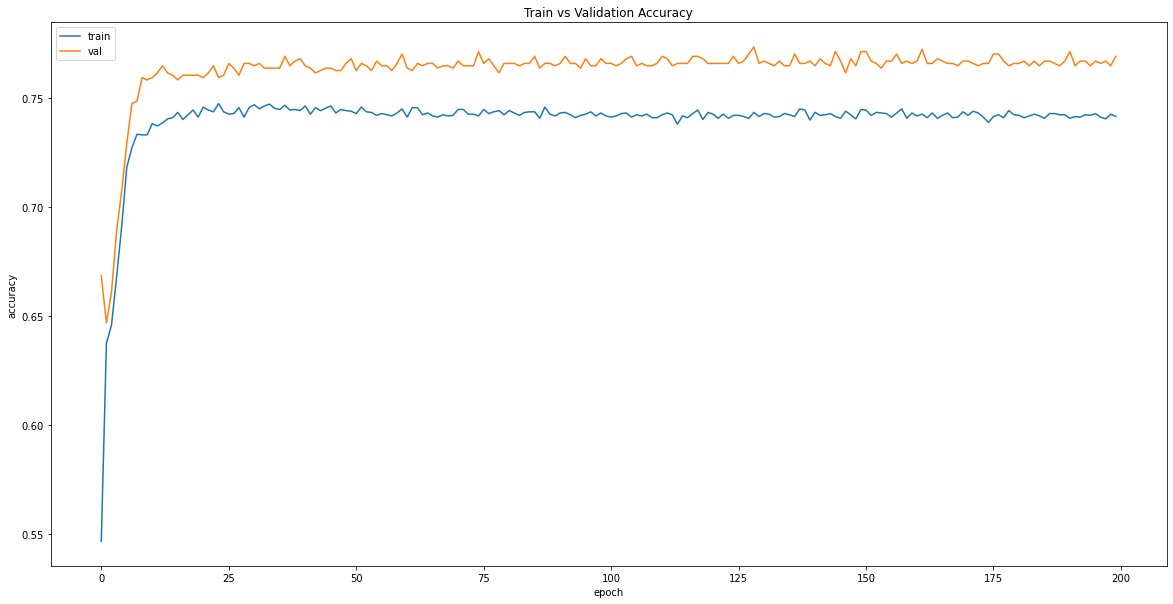

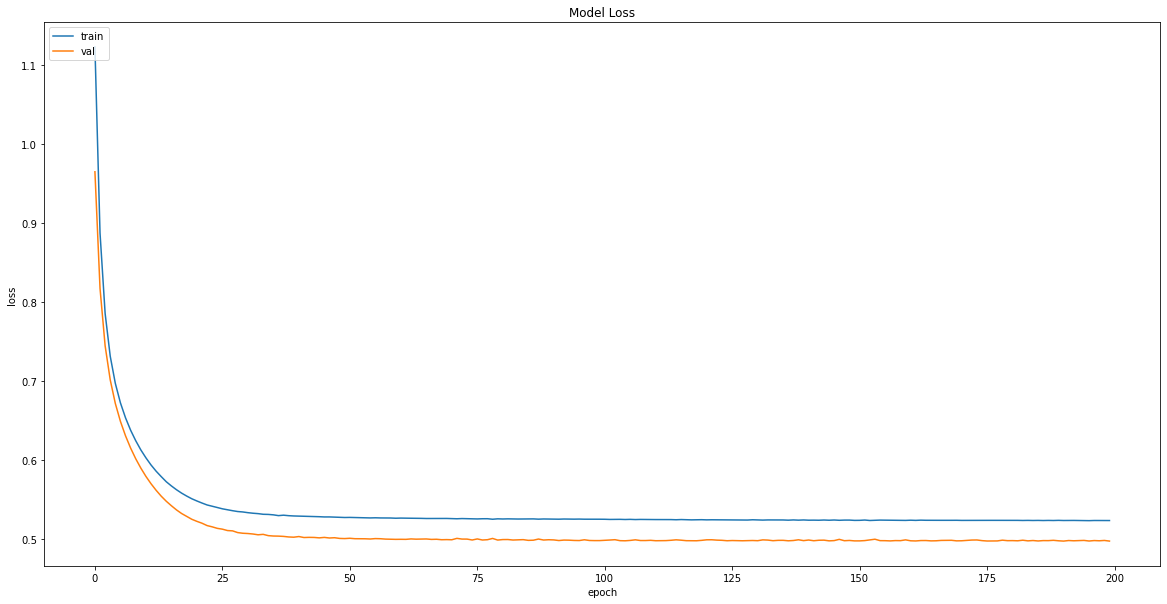

In [72]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['accuracy'])
plt.plot(histories['qn1'].history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [73]:
drivers = np.round(drivers, 0)
constructors = np.round(constructors, 0)

In [74]:
from tensorflow import keras
model = keras.models.load_model("models/qn1.h5")

In [75]:
predictions = model.predict(X_test)

In [76]:
labels = []

for i in predictions:
  labels.append(np.argmax(i))

In [77]:
y_test['predicted'] = labels
y_test

<ipython-input-77-e1fa2b7e3fd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['predicted'] = labels


,label,predicted
2547,1,0
3417,1,1
398,0,0
3174,0,1
2933,0,0
2591,1,0
3184,1,1
2140,0,0
1845,0,0
2842,1,1


In [78]:
y_test['drivers'] = drivers
y_test['constructors'] = constructors
y_test.reindex()
y_test

<ipython-input-78-78b6c02d3c15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['drivers'] = drivers
<ipython-input-78-78b6c02d3c15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['constructors'] = constructors


,label,predicted,drivers,constructors
2547,1,0,155.0,15.0
3417,1,1,17.0,9.0
398,0,0,16.0,12.0
3174,0,1,154.0,208.0
2933,0,0,817.0,5.0
2591,1,0,67.0,5.0
3184,1,1,154.0,208.0
2140,0,0,15.0,205.0
1845,0,0,16.0,10.0
2842,1,1,13.0,6.0


In [79]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
y_test

,label,predicted,drivers,constructors
2547,1,0,155.0,15.0
3417,1,1,17.0,9.0
398,0,0,16.0,12.0
3174,0,1,154.0,208.0
2933,0,0,817.0,5.0
2591,1,0,67.0,5.0
3184,1,1,154.0,208.0
2140,0,0,15.0,205.0
1845,0,0,16.0,10.0
2842,1,1,13.0,6.0


In [80]:
actual = y_test['label'].values

In [81]:
count = 0

for i in range(0,len(labels)):
  if(labels[i] == actual[i]):
    count += 1

print("test accuracy: " + str((count/len(labels))*100))

test accuracy: 77.35644637053088
